### Data Exploration and Visualization

In [86]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import plot_tree
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix


In [54]:
#Load and display the data
iris = pd.read_csv("iris.data")
iris.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**Inference**

Here, the current dataset does not have column names mentioned, thus the first row is automatically considered to be the attribute names.

However, we have the information of the columns in the 'iris.names' file. We can explicitly mention the names of the columns to make it easier to access while loading the dataframe

In [55]:
#Load the data by exclusively mentioning the column names and display it
data = pd.read_csv("iris.data", names = ["sepal_length", "sepal_width",  "petal_length", "petal_width",  "class"])
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
data.shape

(150, 5)

In [57]:
#Get dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Inference**

The dataset has 5 columns:
- sepal length
- sepal width
- petal length
- petal width
- class

There are NO MISSING values and the first 4 columns are of the datatype float.

There are a total of 150 observations in the dataset.

In [58]:
#Get the statistical summary
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Inference**

We get the statistics summary for only the non-object datatypes.

- The average sepal length from all the observations is 5.8 cm. The smallest is 4.3 cm and the largest flower has a sepal length of 7.9 cm
- Average petal length is 3.7 cm, smallest is 1 cm and the largest if 6.9 cm



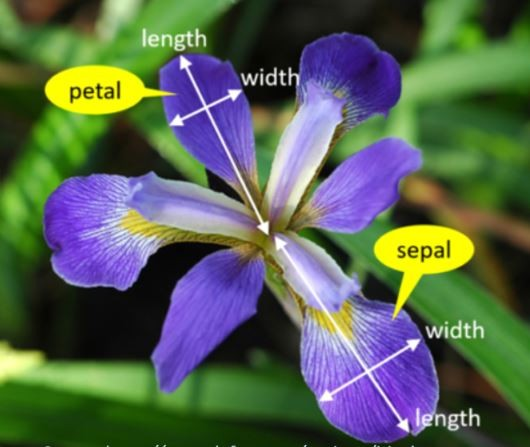


Source: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.linkedin.com%2Fpulse%2Fk-means-clustering-iris-dataset-hani-abudaba&psig=AOvVaw1zCejEUGSi_ERPRzUzKIR9&ust=1705256942417000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCLCi-qT_2oMDFQAAAAAdAAAAABAD

In [59]:
#Reconfirming is we have any missing values
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [60]:
#Class Distribution
cd = data['class'].value_counts()
cd

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<Axes: >

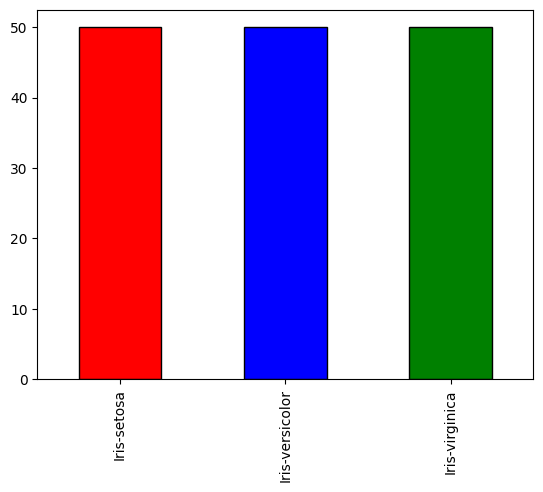

In [61]:
#Visualize the distribution for better understanding
cd.plot(kind="bar", color = ['r', 'b', 'g'], edgecolor = 'black')

**Inference**

The three classes are
- Iris-setosa
- Iris-versicolor
- Iris-virginica

The distribution of all the three classes is equal in this dataset, i,e there is no imbalance in the class distribution.

In [62]:
#Understand the correlation among the attributes
correlation = data.corr()
correlation

<ipython-input-62-192d40516b1d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


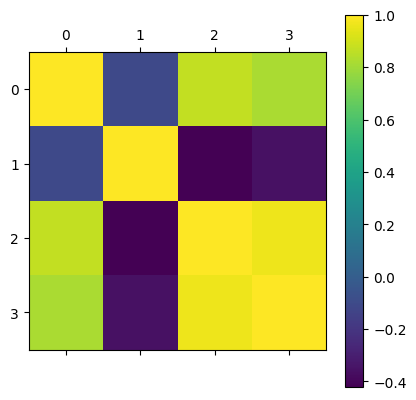

In [63]:
#Visualize the correlation matrix
plt.matshow(correlation)
cb = plt.colorbar()

In [64]:
correlation.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

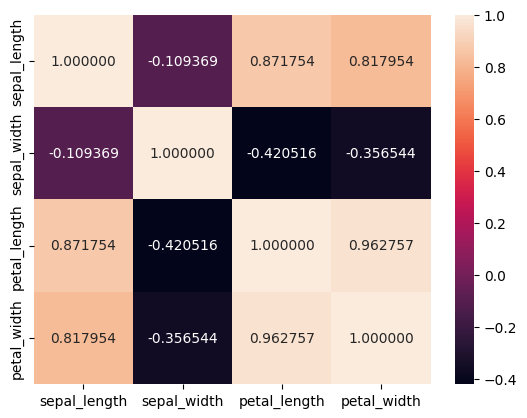

In [65]:
sns.heatmap(correlation, annot=True, fmt=".6f")

**Inference**

Correlation is found only between numerical values.

- Sepal width is negatively correlated to sepal length. This indicates that the longer the sepal, the thinner it is.
- Petal length and petal width are positively correlated
- Sepal width is negatively correlated to petal length and width

</br>

_Comments on Visualization_

- The first plot, requires extra lines and is still not very informative
- The second plot is detailed but works only on platforms like jupyter notebook and colab, due to styling constraints.
- Seaborn has better styling and can include a lot of information within the same function

</br>

The statiscal formula to find the correlation in the .corr() function is **Pearson's coefficient**

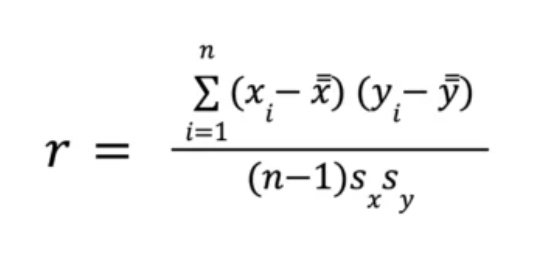

Source: https://data36.com/correlation-definition-calculation-corr-pandas/

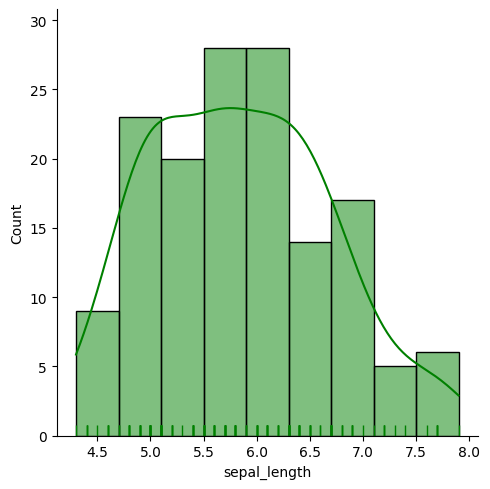

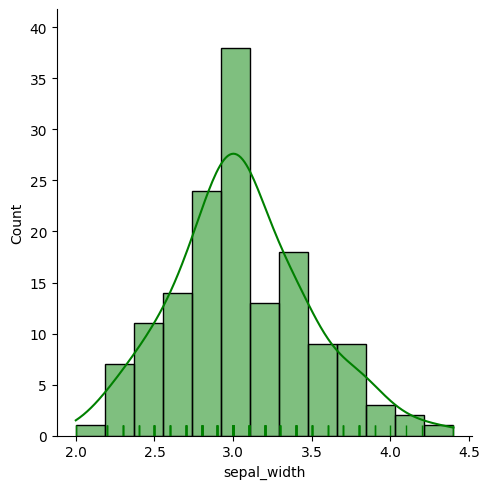

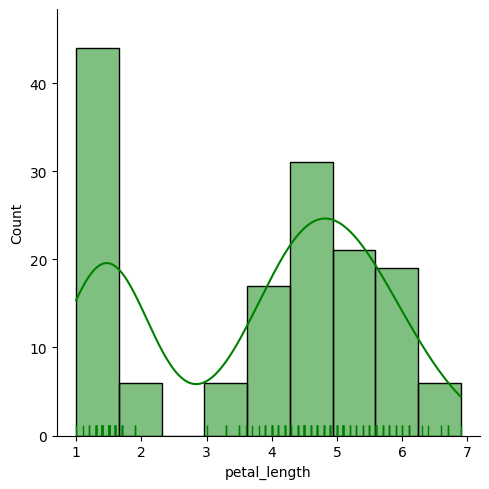

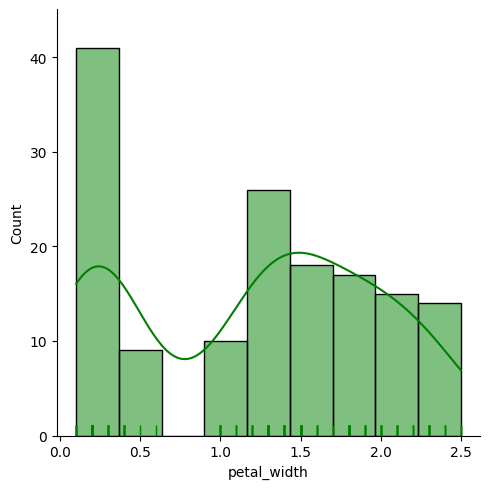

In [66]:
#Distribution of each attribute
for i in data.columns[:-1]:
  sns.displot(data=data,x=i,kde=True, color= "green", rug=True)

**Inference**

- Sepal length and sepal width are normally distributed. This means that most occurences of the data are around the mean.
Skewness is zero since the data is symmetrical.
- Petal length and petal width are bimodal since they have two peaks. This indicates that there are two groups within the distribution.
However, in this case it appears to be two unimodal distributions on the same axis

<Axes: xlabel='sepal_length', ylabel='class'>

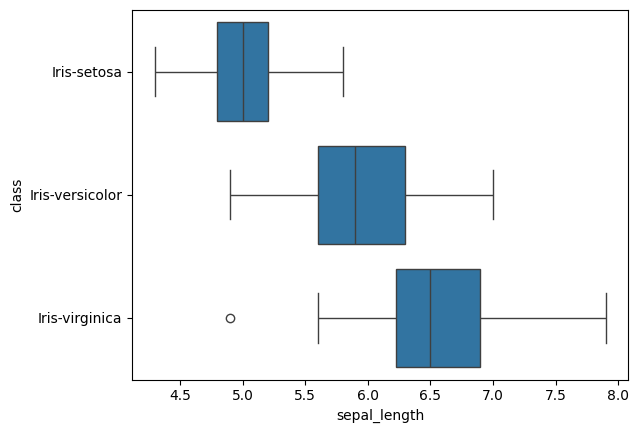

In [67]:
#Identifying outliers in the data columns
sns.boxplot(data, x='sepal_length',y = 'class')


<Axes: xlabel='sepal_width', ylabel='class'>

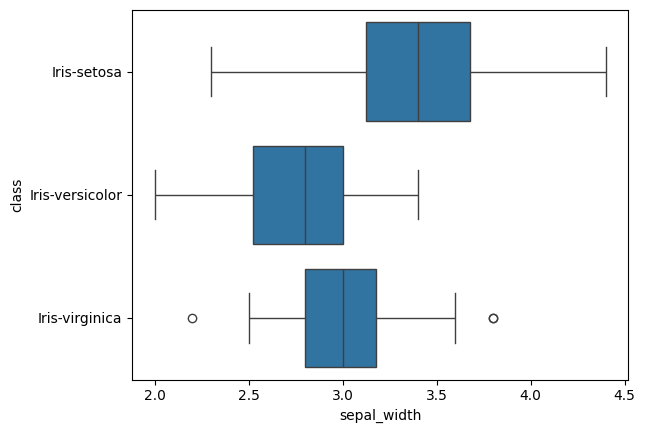

In [68]:
sns.boxplot(data, x='sepal_width', y = 'class')

<Axes: xlabel='petal_length', ylabel='class'>

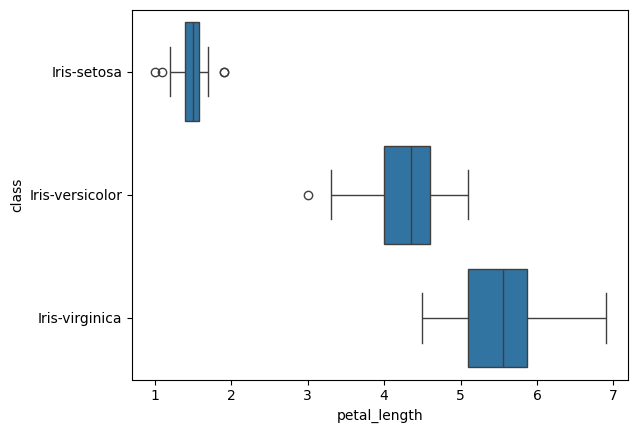

In [69]:
sns.boxplot(data, x='petal_length', y = 'class')

<Axes: xlabel='petal_width', ylabel='class'>

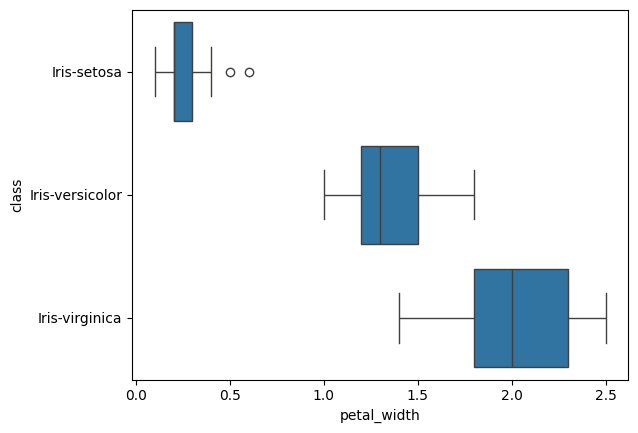

In [70]:
sns.boxplot(data, x='petal_width', y = 'class')

**Inference**

- Sepal length and sepal width have very few outliers with respect to the Iris-virginica and the points overlap
- Petal length and petal width have a few outliers with respect to the Iris-setosa and it is isolated in comparison to other two classes

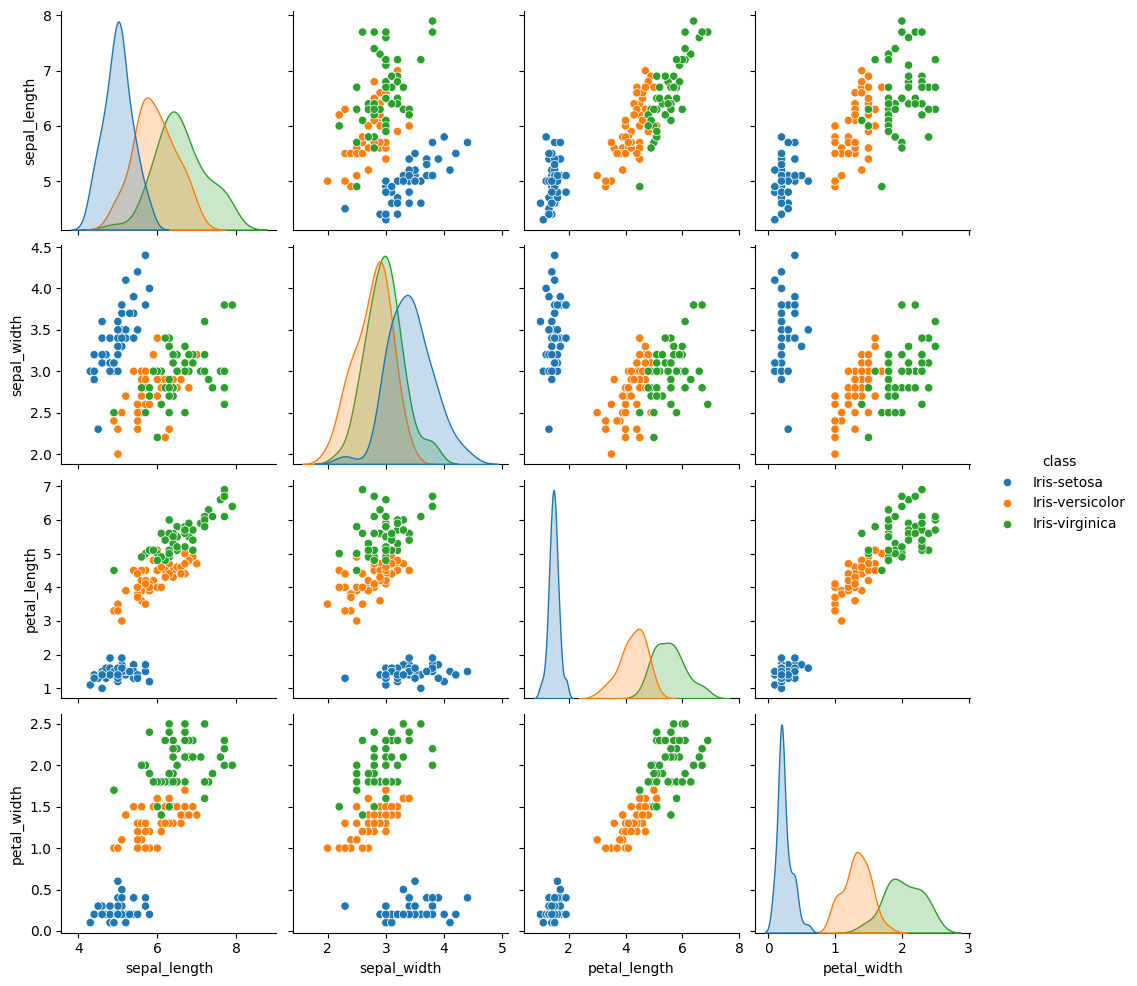

In [71]:
#Get the pairplot (Similar to visualizing the correlation matrix, however, it also shows the distribution)
sns.pairplot(data, hue='class')

**Inference**

We can see that the classes are well separated given the measurements. This means that an ML model will likely be able to learn to separate them.

**Note regarding the dataset**

Since we already have the class associated to each of these attributes, this is a supervised learning problem!

We have about three different species in the dataset, therefore, this is a three-class classification problem


We can use any of the following classifiers to identify the species of a new data point.

- k Nearest Neighbors Classifier
- Naive Bayes Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Machine (LinearSVM)
- MLPClassifier (Neural Networks)

### Data Preprocessing and Feature Scaling

In [72]:
#There are no unnecessary attributes in this dataset, so dimentionality reduction is not required

#Separate the features and target columns
X = data.drop(columns = ['class'])
y = data['class']

#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Scale/Normalize the dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Encode categorical data using one-hot encoding
#one_hot = pd.get_dummies(data['class'])
#new_data = pd.concat([data, one_hot], axis=1)
#new_data = new_data.drop('class', axis=1)
#new_data.head(5)

In [73]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

**Inference**

We need to convert the categorical variables into numeric values since the ML model cannot work with text data

-  We get dummy values for all the class labels
-  Concatenate the dummy values with the original dataset and drop the existing attribute

Source: https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f


However, in our case we don't necessarily need to do that since our target variable is the only non-numeric column.

- Separate feature and target variables
- Split the daata into train (80%) and test sets (20%)
- USing StandardScaler() we normalize the feature variables for both train and test

In [74]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
knn_prediction = knn.predict(x_test)
print("Prediction: ",knn_prediction)

Prediction:  ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [76]:
accuracy_knn = accuracy_score(y_test, knn_prediction)
confusion_matrix_knn = confusion_matrix(y_test, knn_prediction)

In [77]:
print("KNN Accuracy:", accuracy_knn)
print("KNN Confusion Matrix:\n", confusion_matrix_knn)

KNN Accuracy: 1.0
KNN Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Inference**

- We are using 3 neighbors for our kNN classification which gives us a 100% success rate
- This indicates that there is something wrong with the data since getting such a rate is not posible

In [78]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [79]:
nb_prediction = nb.predict(x_test)
print("Prediction: ",nb_prediction)

Prediction:  ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [80]:
accuracy_nb = accuracy_score(y_test, nb_prediction)
confusion_matrix_nb = confusion_matrix(y_test, nb_prediction)

In [81]:
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Confusion Matrix:\n", confusion_matrix_nb)

Naive Bayes Accuracy: 1.0
Naive Bayes Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Inference**

- NB also gives us 100% success rate, which again indicates that it isn't right

In [82]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
dt_prediction = dt.predict(x_test)
print("Prediction: ",dt_prediction)

Prediction:  ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [84]:
accuracy_dt = accuracy_score(y_test, dt_prediction)
confusion_matrix_dt = confusion_matrix(y_test, dt_prediction)

In [85]:
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)

Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Inference**

- DT also gives us 100% success rate, which again indicates that it isn't right

In [87]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
rf_prediction = rf.predict(x_test)
print("Prediction: ",rf_prediction)

Prediction:  ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [89]:
accuracy_rf = accuracy_score(y_test, rf_prediction)
confusion_matrix_rf = confusion_matrix(y_test, rf_prediction)

In [91]:
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)

Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
